In [19]:
import numpy as np
from scipy.stats import ks_2samp
from scipy import stats
import matplotlib.pyplot as plt
import h5py
import illustris_python as il
import sys
sys.path.append('../../py_files/')
#import weights
import control_sample as control
import BRAHMA_python as il_brahma
from tqdm import tqdm

import host_galaxy_enhancement_plots as hostplot


In [20]:
import os
tex_path = '/apps/texlive/2023/bin/x86_64-linux/'
os.environ['PATH'] += os.pathsep + tex_path
import scienceplots
plt.style.use('science')

In [21]:
pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/' 
tng_pop_file_path = '/home/pranavsatheesh/host_galaxies/data/population_files/new/'

TNG_basepath = '/orange/lblecha/IllustrisTNG/Runs/TNG50-1/output'
TNG_50_pop = control.load_pop_file(TNG_basepath,tng_pop_file_path,[0,0,1000,1])
TNG_50_control = control.control_samples_TNG(TNG_50_pop)

processing each merger redshifts for controls: 100%|██████████| 80/80 [00:00<00:00, 190.85it/s]


Number of available mergers in this population is 420
Number of cases where a close enough match is not found within the acceptable tolerance: 28


In [23]:
brahma_basepath="/orange/lblecha/aklantbhowmick/GAS_BASED_SEED_MODEL_UNIFORM_RUNS/L12p5n512/AREPO/"
brahma_simName_array = ['SM5_TNG','SM5_LW10_TNG','SM5_LW10_LOWSPIN_TNG','SM5_LW10_LOWSPIN_RICH_TNG']
brahma_sim_colors = {brahma_simName_array[0]: 'C0', brahma_simName_array[1]: 'C1', brahma_simName_array[2]: 'C2', brahma_simName_array[3]: 'C3'}
brahma_sim_obj = {}
for i,sim in enumerate(brahma_simName_array):
    simPath = brahma_basepath + sim + '/'
    brahma_pop_Nstar10 = control.load_pop_file(simPath,pop_file_path,[0,0,10,1])
    brahma_control = control.control_sample_brahma(brahma_pop_Nstar10)
    brahma_sim_obj[sim] = brahma_control


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 129.62it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 120
number of processable mergers with valid controls:
654


processing each merger redshifts for controls: 100%|██████████| 16/16 [00:00<00:00, 666.34it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 117
number of processable mergers with valid controls:
526


processing each merger redshifts for controls: 100%|██████████| 17/17 [00:00<00:00, 831.49it/s]


Number of cases where a close enough match is not found within the acceptable tolerance: 85
number of processable mergers with valid controls:
400


processing each merger redshifts for controls: 100%|██████████| 18/18 [00:00<00:00, 1165.79it/s]

Number of cases where a close enough match is not found within the acceptable tolerance: 53
number of processable mergers with valid controls:
123


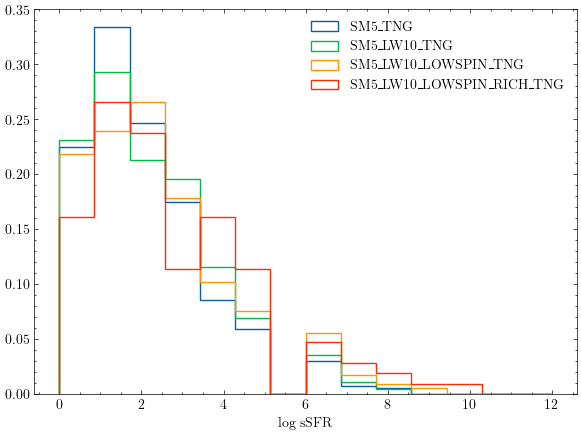

In [34]:
z_min = 0
z_max = 12
z_bins = np.linspace(z_min,z_max,15)

hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=10,ticksize=10,legendsize=10)
fig,ax = plt.subplots(1,1,figsize=(7,5))

for i,sim in enumerate(brahma_simName_array):

    z_mergers = brahma_sim_obj[sim].z_merging_pop
    ax.hist(z_mergers,bins=z_bins,label=sim,histtype='step',density=True,color=brahma_sim_colors[sim])
ax.set_xlabel("log sSFR")
ax.legend()
plt.show()

In [38]:
z_min = 0
z_max = 12
z_bins = np.arange(z_min,z_max,2)

In [ ]:
zbin_width = 0.5

while(np.min(N_values)>=4):
    z_bins = np.arange(z_min,z_max,zbin_width)
    N_values,z_bin_edges = np.histogram(z_mergers,bins=z_bins)
    print(N_values)
    zbin_width+=0.1
print(zbin_width)

0.5


In [80]:
z_min = 0
z_max = 8
zbin_width = 0.1

while True:
   z_bins = np.arange(z_min,z_max,zbin_width)
   N_values,z_bin_edges = np.histogram(z_mergers,bins=z_bins)
   if np.min(N_values>=2):
      break
   else:
      zbin_width+=0.1
      continue
print(zbin_width,z_bins,N_values)

0.8999999999999999 [0.  0.9 1.8 2.7 3.6 4.5 5.4 6.3 7.2] [17 28 25 12 17 12  5  3]


### Check all matches in brahma runs

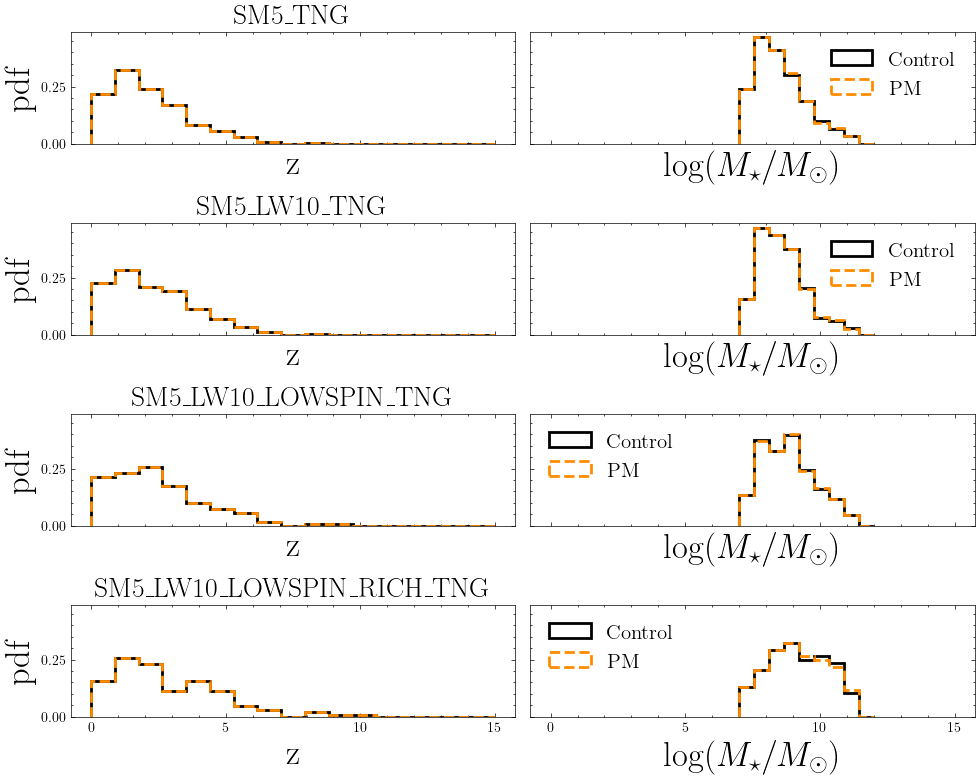

In [5]:
fig, axes = plt.subplots(4,2, figsize=(10,8),sharex=True,sharey=True)
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=20,legendsize=20)
# axes[1][2].set_visible(False)
# axes[1][0].set_position([0.24,0.125,0.228,0.343])
# axes[1][1].set_position([0.55,0.125,0.228,0.343])
flattened_axes = axes.flatten()

for i,sim in enumerate(brahma_simName_array):
    ax_plt = [axes[i][0],axes[i][1]]
    axes_plt = hostplot.match_z_Mstar_plot(ax_plt,brahma_sim_obj[sim],Mstar_binsize = 0.5,Mstar_min = 7,Mstar_max = 12,z_binsize = 0.8,z_min = 0,z_max = 15)
    axes_plt[0].set_title(sim)

fig.tight_layout()

## sSFR enhancements in BRAHMA 

Median sSFR in mergers:
SM5_TNG,8.52e-10
SM5_LW10_TNG,8.60e-10
SM5_LW10_LOWSPIN_TNG,1.03e-09
SM5_LW10_LOWSPIN_RICH_TNG,1.25e-09


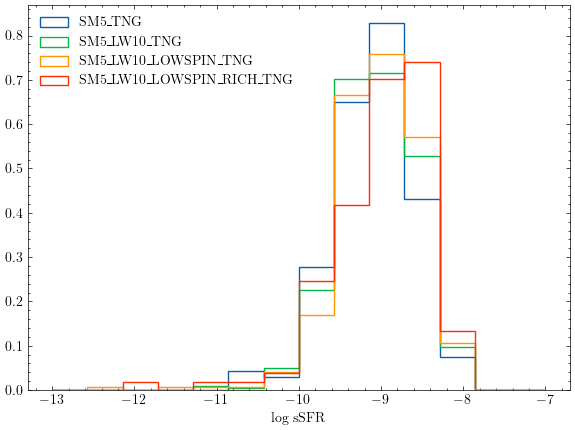

In [6]:
SFR_log_min = -13
SFR_log_max = -7
SFR_log_bins = np.linspace(SFR_log_min,SFR_log_max,15)

hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=10,ticksize=10,legendsize=10)
fig,ax = plt.subplots(1,1,figsize=(7,5))

print("Median sSFR in mergers:")
for i,sim in enumerate(brahma_simName_array):

    SFR_mergers = brahma_sim_obj[sim].sSFR_merging_pop
    print(f"{sim},{np.median(SFR_mergers[SFR_mergers>0]):2.2e}")
    ax.hist(np.log10(SFR_mergers[SFR_mergers>0]),bins=SFR_log_bins,label=sim,histtype='step',density=True,color=brahma_sim_colors[sim])
ax.set_xlabel("log sSFR")
ax.legend()
plt.show()

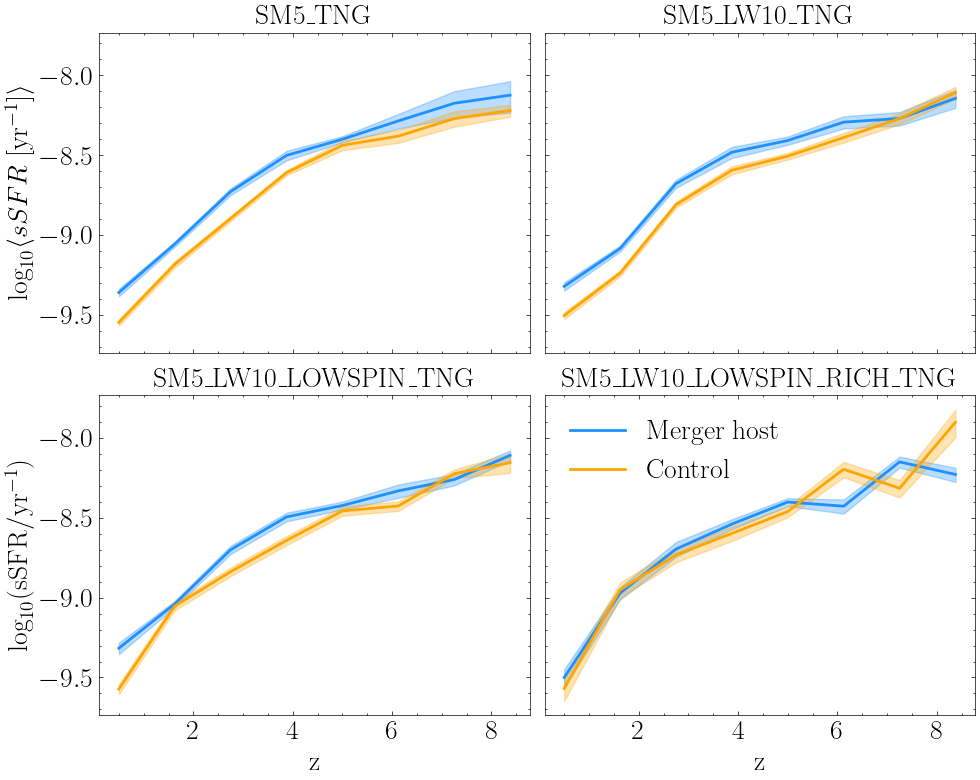

In [7]:
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=20,legendsize=20)
fig, axes = plt.subplots(2,2, figsize=(10,8),sharex=True,sharey=True)

# axes[1][2].set_visible(False)
# axes[1][0].set_position([0.24,0.125,0.228,0.343])
# axes[1][1].set_position([0.55,0.125,0.228,0.343])
flattened_axes = axes.flatten()

for i,sim in enumerate(brahma_simName_array):
    ax1 = hostplot.sSFR_evolution_comparison_plot(flattened_axes[i],brahma_sim_obj[sim],z_min=0,z_max=9,z_binsize=1)
    ax1.set_title(sim)

axes[0,0].set_ylabel(r'$\log_{10}\langle sSFR \; [\mathrm{yr}^{-1}]\rangle$')
axes[1,0].set_ylabel(r'$\log_{10}(\mathrm{sSFR/yr^{-1}})$')
axes[1,0].set_xlabel('z')
axes[1,1].set_xlabel('z')

ax1.legend()
fig.tight_layout()  
#handles, labels = ax1.get_legend_handles_labels()
#fig.legend(handles,labels,loc="upper right")

/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/blue/lblecha/pranavsatheesh/.conda/envs/hfrl/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type

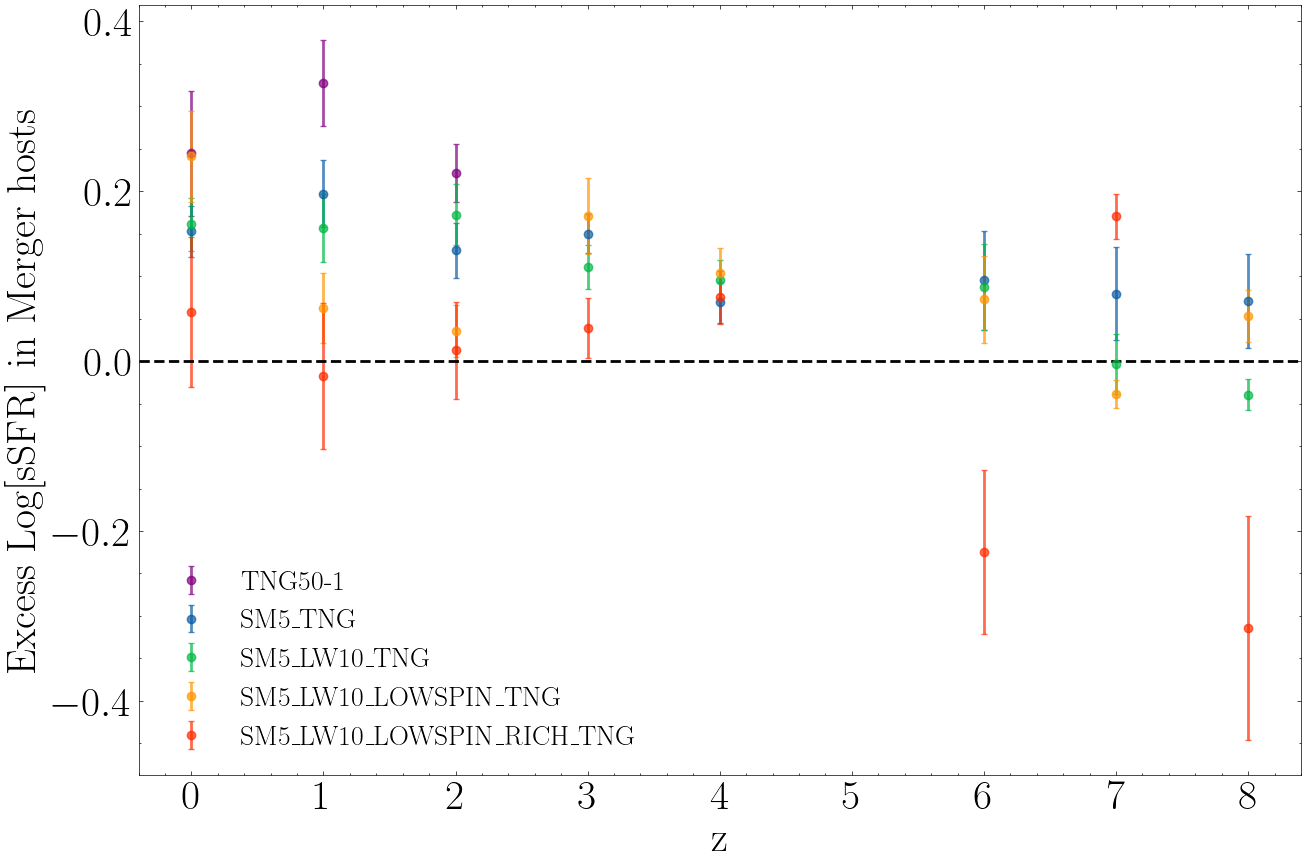

In [8]:
z_bins = np.arange(0,10,1)
z_bins_tng = np.arange(0,4,1)

hostplot.set_plot_style(linewidth=2, titlesize=30,labelsize=30,ticksize=30,legendsize=20)
fig,ax = plt.subplots(1,1,figsize=(15,10))


avg_sSFR_tng,std_sSFR_tng = hostplot.sSFR_enhancement_calculate(TNG_50_control,z_bins_tng)
ax.errorbar(z_bins_tng[:-1],avg_sSFR_tng,yerr=std_sSFR_tng,fmt='o',capsize=2,label='TNG50-1',color='purple',alpha=0.7)
for i,sim in enumerate(brahma_simName_array):
    avg_sSFR_enh,std_sSFR_enh = hostplot.sSFR_enhancement_calculate(brahma_sim_obj[sim],z_bins)
    ax.errorbar(z_bins[:-1],avg_sSFR_enh,yerr=std_sSFR_enh,fmt='o',capsize=2,label=sim,color=brahma_sim_colors[sim],alpha=0.7)

ax.set_xlabel('z')
ax.set_ylabel('Excess Log[sSFR] in Merger hosts')
ax.axhline(0,linestyle='--',color='k')
ax.legend()

## BHAR enhancements in BRAHMA

Median BHAR in mergers:
SM5_TNG,1.34e-04
SM5_LW10_TNG,1.65e-04
SM5_LW10_LOWSPIN_TNG,2.83e-04
SM5_LW10_LOWSPIN_RICH_TNG,3.72e-04


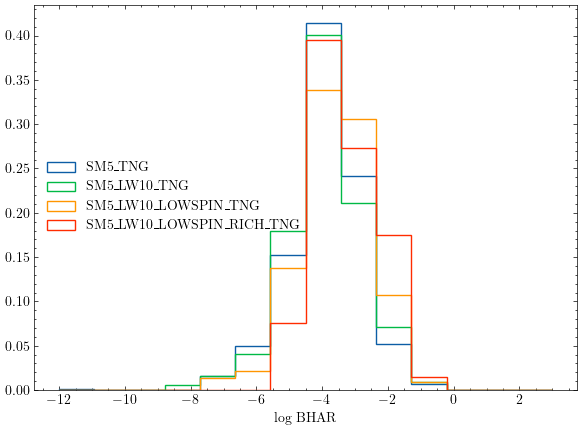

In [9]:
SFR_log_min = -12
SFR_log_max = 3
SFR_log_bins = np.linspace(SFR_log_min,SFR_log_max,15)

hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=10,ticksize=10,legendsize=10)
fig,ax = plt.subplots(1,1,figsize=(7,5))

print("Median BHAR in mergers:")
for i,sim in enumerate(brahma_simName_array):

    Mdot_mergers = brahma_sim_obj[sim].Mdot_merging_pop
    print(f"{sim},{np.median(Mdot_mergers[Mdot_mergers>0]):2.2e}")
    ax.hist(np.log10(Mdot_mergers[Mdot_mergers>0]),bins=SFR_log_bins,label=sim,histtype='step',density=True,color=brahma_sim_colors[sim])
ax.set_xlabel("log BHAR")
ax.legend()
plt.show()

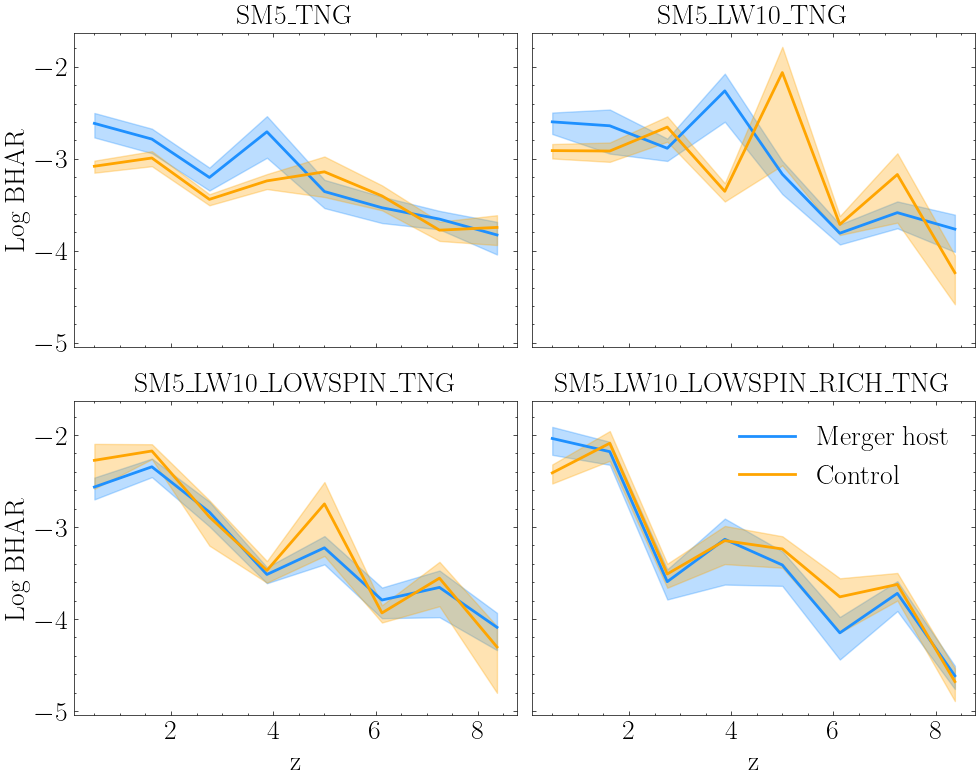

In [10]:
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=20,legendsize=20)
fig, axes = plt.subplots(2,2, figsize=(10,8),sharex=True,sharey=True)

# axes[1][2].set_visible(False)
# axes[1][0].set_position([0.24,0.125,0.228,0.343])
# axes[1][1].set_position([0.55,0.125,0.228,0.343])
flattened_axes = axes.flatten()

for i,sim in enumerate(brahma_simName_array):
    ax1 = hostplot.Mdot_evolution_comparison_plot(flattened_axes[i],brahma_sim_obj[sim],z_min=0,z_max=9,z_binsize=1)
    ax1.set_title(sim)

axes[0,0].set_ylabel('Log BHAR')
axes[1,0].set_ylabel('Log BHAR')
axes[1,0].set_xlabel('z')
axes[1,1].set_xlabel('z')

ax1.legend()
fig.tight_layout()  

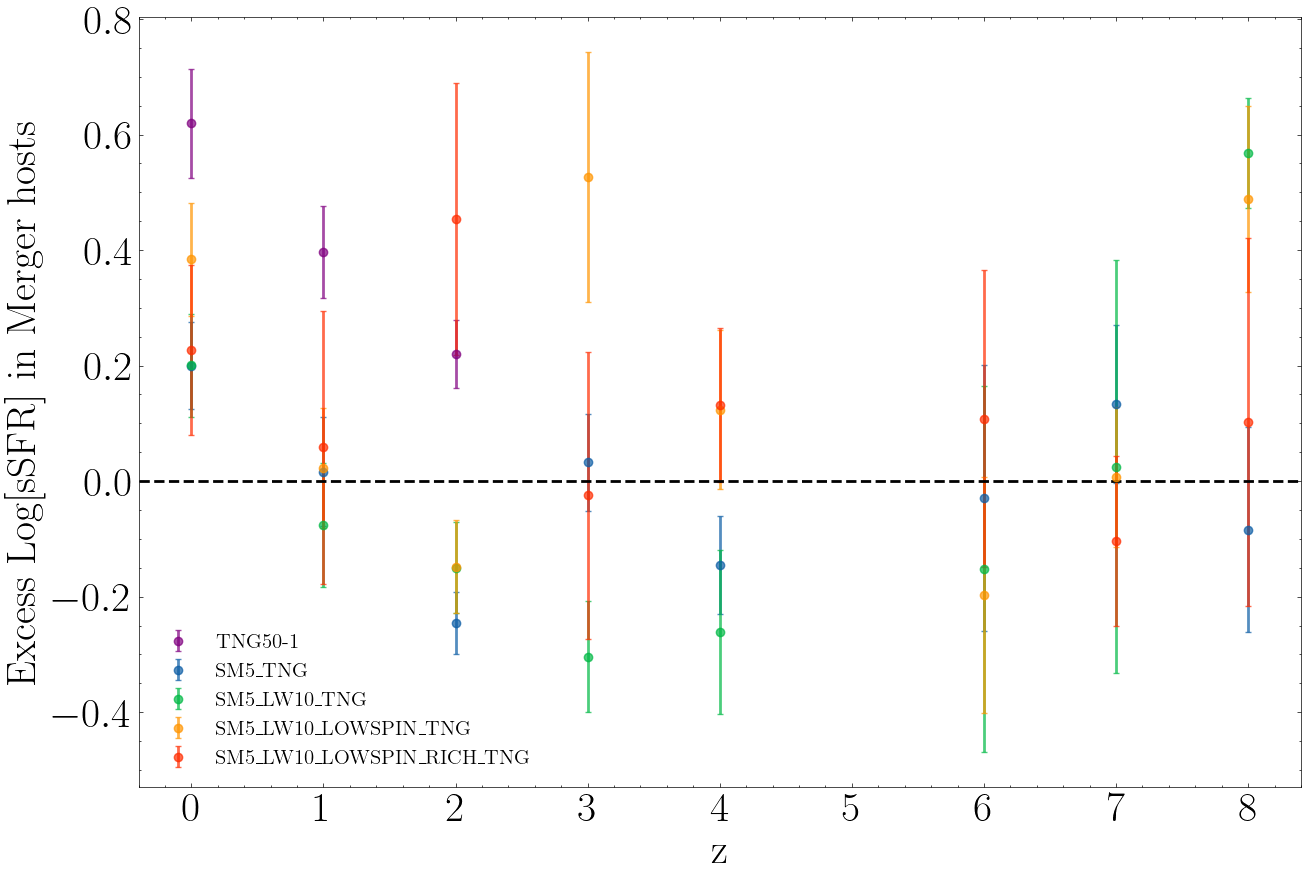

In [11]:
z_bins = np.arange(0,10,1)
z_bins_tng = np.arange(0,4,1)

hostplot.set_plot_style(linewidth=2, titlesize=30,labelsize=30,ticksize=30,legendsize=15)
fig,ax = plt.subplots(1,1,figsize=(15,10))


avg_sSFR_tng,std_sSFR_tng = hostplot.Mdot_enhancement_calculate(TNG_50_control,z_bins_tng)
ax.errorbar(z_bins_tng[:-1],avg_sSFR_tng,yerr=std_sSFR_tng,fmt='o',capsize=2,label='TNG50-1',color='purple',alpha=0.7)
for i,sim in enumerate(brahma_simName_array):
    avg_sSFR_enh,std_sSFR_enh = hostplot.Mdot_enhancement_calculate(brahma_sim_obj[sim],z_bins)
    ax.errorbar(z_bins[:-1],avg_sSFR_enh,yerr=std_sSFR_enh,fmt='o',capsize=2,label=sim,color=brahma_sim_colors[sim],alpha=0.7)

ax.set_xlabel('z')
ax.set_ylabel('Excess Log[sSFR] in Merger hosts')
ax.axhline(0,linestyle='--',color='k')
ax.legend()

## sBHAR enhancements in BRAHMA

Median sSFR in mergers:
SM5_TNG,2.25e-11
SM5_LW10_TNG,6.92e-11
SM5_LW10_LOWSPIN_TNG,1.56e-10
SM5_LW10_LOWSPIN_RICH_TNG,2.49e-10


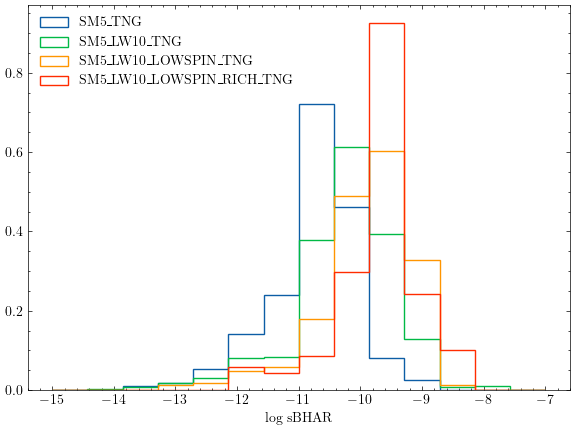

In [12]:
sBHAR_log_min = -15
sBHAR_log_max = -7
sBHAR_log_bins = np.linspace(sBHAR_log_min,sBHAR_log_max,15)

hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=10,ticksize=10,legendsize=10)
fig,ax = plt.subplots(1,1,figsize=(7,5))

print("Median sSFR in mergers:")
for i,sim in enumerate(brahma_simName_array):

    sBHAR_mergers = brahma_sim_obj[sim].sBHAR_merging_pop
    print(f"{sim},{np.median(sBHAR_mergers[sBHAR_mergers>0]):2.2e}")
    ax.hist(np.log10(sBHAR_mergers[sBHAR_mergers>0]),bins=sBHAR_log_bins,label=sim,histtype='step',density=True,color=brahma_sim_colors[sim])
ax.set_xlabel("log sBHAR")
ax.legend()
plt.show()

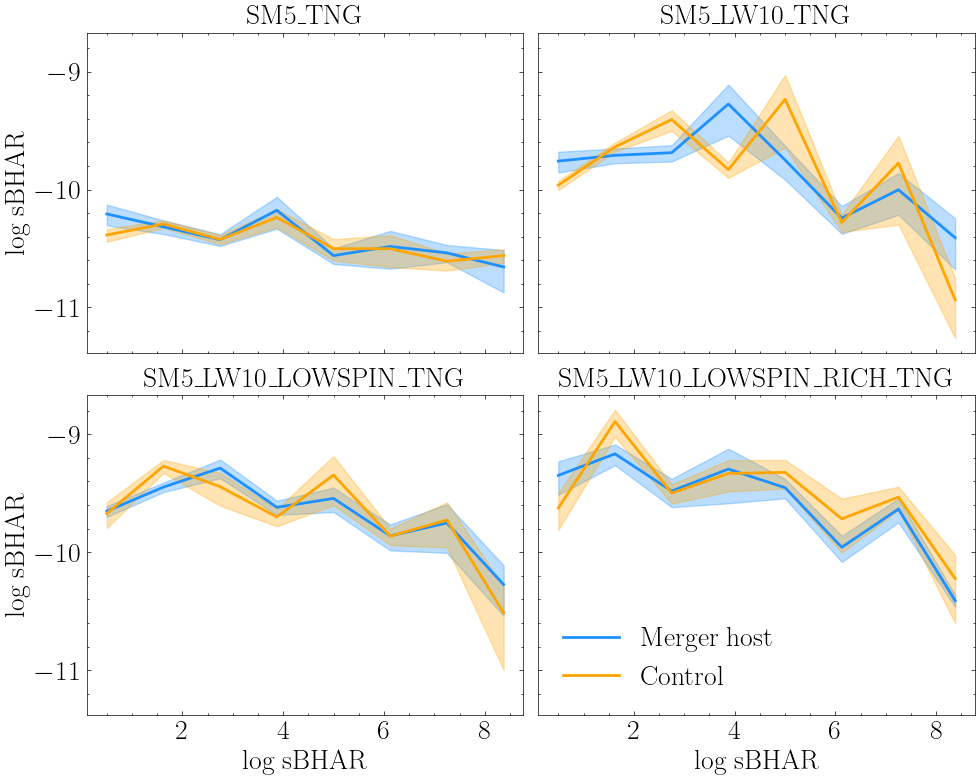

In [14]:
hostplot.set_plot_style(linewidth=2, titlesize=20,labelsize=20,ticksize=20,legendsize=20)
fig, axes = plt.subplots(2,2, figsize=(10,8),sharex=True,sharey=True)

# axes[1][2].set_visible(False)
# axes[1][0].set_position([0.24,0.125,0.228,0.343])
# axes[1][1].set_position([0.55,0.125,0.228,0.343])
flattened_axes = axes.flatten()

for i,sim in enumerate(brahma_simName_array):
    ax1 = hostplot.sBHAR_evolution_comparison_plot(flattened_axes[i],brahma_sim_obj[sim],z_min=0,z_max=9,z_binsize=1)
    ax1.set_title(sim)

axes[0,0].set_ylabel('log sBHAR')
axes[1,0].set_ylabel('log sBHAR')
axes[1,0].set_xlabel('log sBHAR')
axes[1,1].set_xlabel('log sBHAR')

ax1.legend()
fig.tight_layout()  

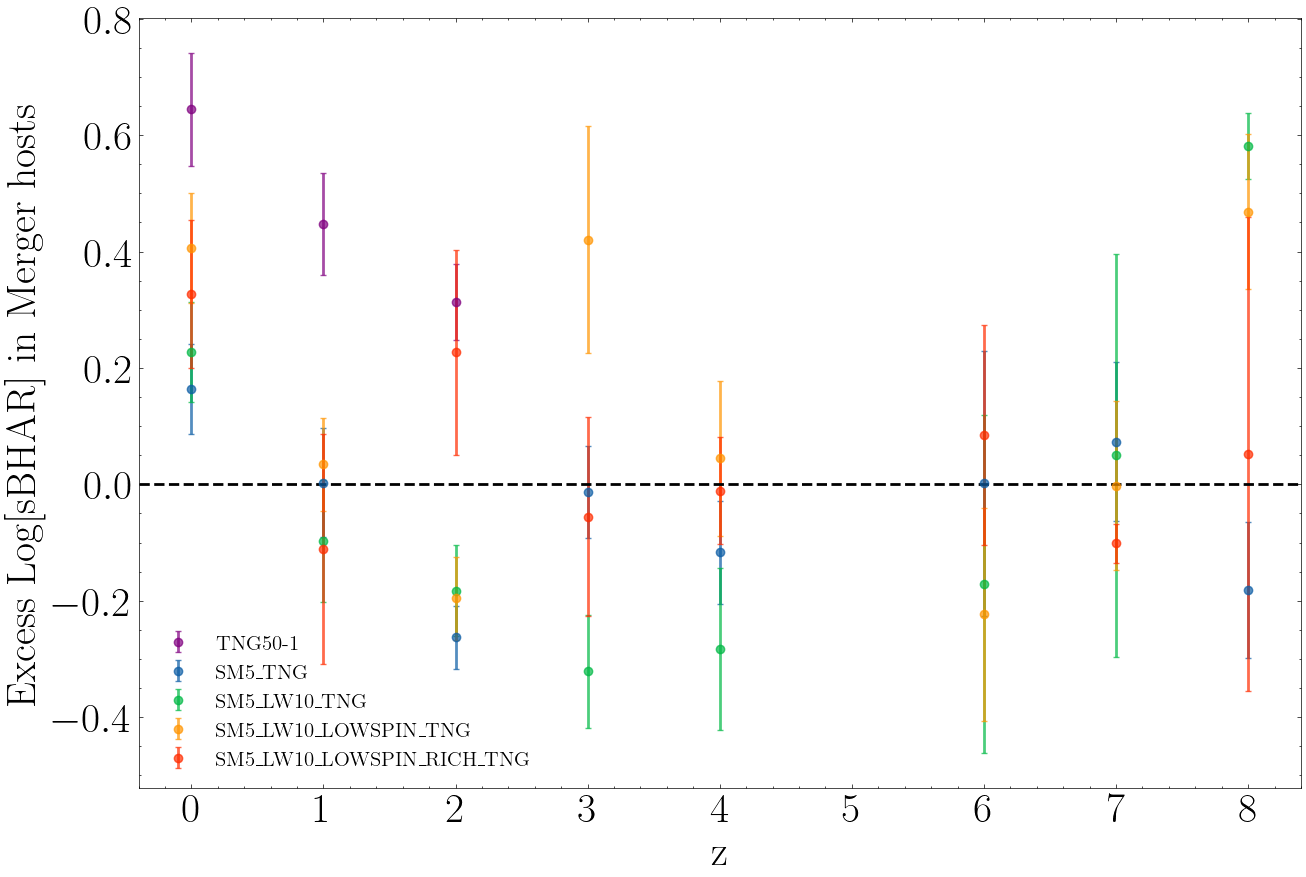

In [18]:
z_bins = np.arange(0,10,1)
z_bins_tng = np.arange(0,4,1)

hostplot.set_plot_style(linewidth=2, titlesize=30,labelsize=30,ticksize=30,legendsize=15)
fig,ax = plt.subplots(1,1,figsize=(15,10))


avg_sSFR_tng,std_sSFR_tng = hostplot.sBHAR_enhancement_calculate(TNG_50_control,z_bins_tng)
ax.errorbar(z_bins_tng[:-1],avg_sSFR_tng,yerr=std_sSFR_tng,fmt='o',capsize=2,label='TNG50-1',color='purple',alpha=0.7)
for i,sim in enumerate(brahma_simName_array):
    avg_sSFR_enh,std_sSFR_enh = hostplot.sBHAR_enhancement_calculate(brahma_sim_obj[sim],z_bins)
    ax.errorbar(z_bins[:-1],avg_sSFR_enh,yerr=std_sSFR_enh,fmt='o',capsize=2,label=sim,color=brahma_sim_colors[sim],alpha=0.7)

ax.set_xlabel('z')
ax.set_ylabel('Excess Log[sBHAR] in Merger hosts')
ax.axhline(0,linestyle='--',color='k')
ax.legend(loc="lower left")